Proyecto de Programación para Estadística II

In [1]:
!pip install unidecode

In [2]:
#importacion de paquetes
import pandas as pd
import numpy as np
import csv, json
from unidecode import unidecode


#Cargar y cortar bases


In [3]:

with open ('/content/FAOSTAT_data_eng.json' , 'r', encoding = 'utf-8') as f:
  agropecuario = json.load(f)
  agropecuario = pd.DataFrame(agropecuario)
agropecuario.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import value,T0010,Total Merchandise Trade,2000,2000,1000 USD,1176000,X,Figure from external organization,Estimated data using trading partners database
1,TCL,Crops and livestock products,4,Afghanistan,5922,Export value,T0010,Total Merchandise Trade,2000,2000,1000 USD,137000,X,Figure from external organization,Estimated data using trading partners database
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import value,T0010,Total Merchandise Trade,2001,2001,1000 USD,1696000,X,Figure from external organization,Estimated data using trading partners database
3,TCL,Crops and livestock products,4,Afghanistan,5922,Export value,T0010,Total Merchandise Trade,2001,2001,1000 USD,68000,X,Figure from external organization,Estimated data using trading partners database
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import value,T0010,Total Merchandise Trade,2002,2002,1000 USD,2452000,X,Figure from external organization,Estimated data using trading partners database


In [4]:
#seleccionar las columnas necesarias
agropecuario = agropecuario[['Area', 'Element','Year','Value']]

#cambiar a minuscula
agropecuario.columns = agropecuario.columns.str.lower()

#renombrar
agropecuario = agropecuario.rename(columns={ 'value' : 'trade_value' , #valor de comercio x 1000 USD
                                              'element' : 'trade_flow'}) # flujo comercial(import,export)
agropecuario.head()


,area,trade_flow,year,trade_value
0,Afghanistan,Import value,2000,1176000
1,Afghanistan,Export value,2000,137000
2,Afghanistan,Import value,2001,1696000
3,Afghanistan,Export value,2001,68000
4,Afghanistan,Import value,2002,2452000


In [5]:
#filtrar por exportaciones
agropecuario_filtrado = agropecuario[agropecuario['trade_flow'] == 'Export value']
#filtrar por exportaciones
print(f'Hay {agropecuario_filtrado['area'].nunique()} paises en total')
agropecuario_filtrado.head()


Hay 198 paises en total


,area,trade_flow,year,trade_value
1,Afghanistan,Export value,2000,137000
3,Afghanistan,Export value,2001,68000
5,Afghanistan,Export value,2002,100000
7,Afghanistan,Export value,2003,144000
9,Afghanistan,Export value,2004,314000


In [6]:
IDM= pd.read_excel('/content/Indicadores del Desarrollo Mundial.xlsx')
IDM.head()

,,STRUCTURE_ID,ACTION,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,SEX,...,DATA_SOURCE_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,TIME_FORMAT,TIME_FORMAT_LABEL,COMMENT_OBS,OBS_STATUS,OBS_STATUS_LABEL,OBS_CONF,OBS_CONF_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,AFE,Africa Eastern and Southern,WB_WDI_NY_GDP_MKTP_PP_CD,"GDP, PPP (current international $)",_T,...,World Development Indicators (WDI),CUR,Currency,P1Y,Annual,NaN,A,Normal value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,AFW,Africa Western and Central,WB_WDI_NY_GDP_MKTP_PP_CD,"GDP, PPP (current international $)",_T,...,World Development Indicators (WDI),CUR,Currency,P1Y,Annual,NaN,A,Normal value,PU,Public
2,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,ARB,Arab World,WB_WDI_NY_GDP_MKTP_PP_CD,"GDP, PPP (current international $)",_T,...,World Development Indicators (WDI),CUR,Currency,P1Y,Annual,NaN,A,Normal value,PU,Public
3,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,CSS,Caribbean small states,WB_WDI_NY_GDP_MKTP_PP_CD,"GDP, PPP (current international $)",_T,...,World Development Indicators (WDI),CUR,Currency,P1Y,Annual,NaN,A,Normal value,PU,Public
4,datastructure,WB.DATA360:DS_DATA360(1.3),I,A,Annual,CEB,Central Electricity Board (CEB),WB_WDI_NY_GDP_MKTP_PP_CD,"GDP, PPP (current international $)",_T,...,World Development Indicators (WDI),CUR,Currency,P1Y,Annual,NaN,A,Normal value,PU,Public


In [7]:

#seleccionar las columnas necesarias
IDM = IDM[['REF_AREA_LABEL', 'TIME_PERIOD','OBS_VALUE']]
#renombrar las columnas
IDM = IDM.rename (columns={
    'REF_AREA_LABEL' : 'area',
    'TIME_PERIOD' : 'year',
    'OBS_VALUE' : 'PIB_ppp'
})
#filtrar por year
IDM = IDM[
    (IDM['year'] >= 2000) & (IDM['year'] <= 2020)
]
#cambiar valor a float
pd.options.display.float_format = '{:,.2f}'.format

IDM.head()

,area,year,PIB_ppp
2373,Africa Eastern and Southern,2000,"859,715,000,000.00"
2374,Africa Western and Central,2000,"558,812,000,000.00"
2375,Arab World,2000,"2,843,940,000,000.00"
2376,Caribbean small states,2000,"46,116,518,684.00"
2377,Central Electricity Board (CEB),2000,"1,088,350,000,000.00"


In [8]:
paises_elegidos = [
    "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Aruba",
    "Australia", "Austria", "Azerbaijan", "Bahamas, The", "Bahrain", "Bangladesh", "Barbados", "Belarus",
    "Belgium", "Belize", "Benin", "Bermuda", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana",
    "Brazil", "Brunei Darussalam", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia",
    "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros",
    "Congo, Dem. Rep.", "Congo, Rep.", "Costa Rica", "Cote d'Ivoire", "Croatia", "Cyprus", "Czechia",
    "Denmark", "Dominica", "Dominican Republic", "Ecuador", "Egypt, Arab Rep.", "El Salvador",
    "Equatorial Guinea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon",
    "Gambia, The", "Georgia", "Germany", "Ghana", "Greece", "Greenland", "Grenada", "Guatemala", "Guinea",
    "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hong Kong SAR, China", "Hungary", "Iceland", "India",
    "Indonesia", "Iran, Islamic Rep.", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Korea, Rep.", "Kuwait", "Kyrgyz Republic", "Lao PDR", "Latvia",
    "Lebanon", "Lesotho", "Liberia", "Libya", "Lithuania", "Luxembourg", "Macao SAR, China", "Madagascar",
    "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius",
    "Mexico", "Micronesia, Fed. Sts.", "Moldova", "Mongolia", "Morocco", "Mozambique", "Myanmar", "Namibia",
    "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines",
    "Poland", "Portugal", "Puerto Rico", "Qatar", "Romania", "Russian Federation", "Rwanda", "Samoa",
    "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Seychelles", "Sierra Leone", "Singapore",
    "Slovak Republic", "Slovenia", "Solomon Islands", "South Africa", "Spain", "Sri Lanka",
    "St. Kitts and Nevis", "St. Lucia", "St. Vincent and the Grenadines", "Sudan", "Suriname", "Sweden",
    "Switzerland", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkiye", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela, RB", "Viet Nam",
    "Yemen, Rep.", "Zambia", "Zimbabwe"
]

IDM_filtrado = IDM[IDM['area'].isin(paises_elegidos)]

print(f'Son {IDM_filtrado['area'].nunique()} paises en total')
print(IDM_filtrado.head())

Son 185 paises en total
                     area  year            PIB_ppp
2422              Albania  2000  12,284,832,047.00
2423              Algeria  2000 283,908,000,000.00
2424              Andorra  2000   2,197,696,492.00
2425               Angola  2000  53,876,764,896.00
2426  Antigua and Barbuda  2000   1,447,217,180.00


In [9]:
mortalidad = pd.read_csv('/content/Tasa de mortalidad infantil.csv')
mortalidad.head()

,Entity,Code,Year,child_mortality_rate
0,Afghanistan,AFG,2000,13.17
1,Afghanistan,AFG,2001,12.74
2,Afghanistan,AFG,2002,12.31
3,Afghanistan,AFG,2003,11.87
4,Afghanistan,AFG,2004,11.42


In [10]:
#renombrar columnas
mortalidad = mortalidad.rename(columns={'Entity' : 'Area'})

#poner minuscula
mortalidad.columns = mortalidad.columns.str.lower()

#cortar base
mortalidad_filtrado = mortalidad[['area', 'year', 'child_mortality_rate']]

print(f'Son {mortalidad['area'].nunique()} en total')
mortalidad_filtrado.head()

Son 212 en total


,area,year,child_mortality_rate
0,Afghanistan,2000,13.17
1,Afghanistan,2001,12.74
2,Afghanistan,2002,12.31
3,Afghanistan,2003,11.87
4,Afghanistan,2004,11.42


#Limpieza

In [11]:
#nulos
print('\nFaltantes agropecuario:\n', agropecuario_filtrado.isna().sum())
print('\nFaltantes IDM:\n', IDM_filtrado.isna().sum())
print('\nFaltantes mortalidad:\n', mortalidad_filtrado.isna().sum())



Faltantes agropecuario:
 area           0
trade_flow     0
year           0
trade_value    0
dtype: int64

Faltantes IDM:
 area       0
year       0
PIB_ppp    0
dtype: int64

Faltantes mortalidad:
 area                    0
year                    0
child_mortality_rate    0
dtype: int64


In [12]:
#duplicados
print('\nDuplicados agropecuarios:\n', agropecuario_filtrado.duplicated().sum())
print('\nDuplicados IDM:\n', IDM_filtrado.duplicated().sum())
print('\nDuplicados mortalidad:\n', mortalidad_filtrado.duplicated().sum())


Duplicados agropecuarios:
 0

Duplicados IDM:
 0

Duplicados mortalidad:
 0


In [13]:
# 4) Claves no coincidentes
ids_agrop = set(agropecuario_filtrado['area'])
ids_IMD = set(IDM_filtrado['area'])
ids_mort = set(mortalidad_filtrado['area'])

solo_IDM = sorted(list(ids_IMD - ids_agrop))[:10]
solo_agro = sorted(list(ids_agrop - ids_IMD))[:10]
solo_mort = sorted(list(ids_mort - ids_agrop))[:10]
solo_IDm = sorted(list(ids_IMD - ids_mort))[:10]

print('\nEjemplo IDs en IDM pero no en agro:', solo_IDM)
print('Ejemplo IDs en agro pero no en IDM:', solo_agro)
print('Ejemplo IDs en mortalidad pero no en agrop:', solo_mort)
print('Ejemplo IDs en IDM pero no en mortalidad:', solo_IDm)



Ejemplo IDs en IDM pero no en agro: ['Andorra', 'Aruba', 'Bahamas, The', 'Bermuda', 'Bolivia', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt, Arab Rep.', 'Gambia, The']
Ejemplo IDs en agro pero no en IDM: ['Afghanistan', 'Bahamas', 'Bolivia (Plurinational State of)', 'China, Hong Kong SAR', 'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland', 'Congo', 'Cook Islands', 'Cuba']
Ejemplo IDs en mortalidad pero no en agrop: ['Africa', 'Andorra', 'Anguilla', 'Asia', 'Bolivia', 'British Virgin Islands', 'Brunei', 'Cape Verde', "Cote d'Ivoire", 'Democratic Republic of Congo']
Ejemplo IDs en IDM pero no en mortalidad: ['Aruba', 'Bahamas, The', 'Bermuda', 'Brunei Darussalam', 'Cabo Verde', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Egypt, Arab Rep.', 'Gambia, The', 'Greenland']


Merge

In [14]:
merge_IDM_agro = pd.merge(IDM_filtrado, agropecuario_filtrado, on=['area', 'year'], how='inner')
base_final = pd.merge(merge_IDM_agro, mortalidad_filtrado, on=['area', 'year'], how='inner')
base_final.head()
#trade_value= valor de comercio x 1000 USD
#trade_flow= flujo comercial

,area,year,PIB_ppp,trade_flow,trade_value,child_mortality_rate
0,Albania,2000,"12,284,832,047.00",Export value,261000,2.71
1,Algeria,2000,"283,908,000,000.00",Export value,22040967,4.16
2,Angola,2000,"53,876,764,896.00",Export value,7702000,20.30
3,Antigua and Barbuda,2000,"1,447,217,180.00",Export value,50000,1.49
4,Argentina,2000,"427,960,000,000.00",Export value,26341029,1.94


In [15]:
print('\nNaNs:\n', base_final.isna().sum())


NaNs:
 area                    0
year                    0
PIB_ppp                 0
trade_flow              0
trade_value             0
child_mortality_rate    0
dtype: int64


# Análisis estadístico

In [16]:
import pandas as pd

base_final.describe()
base_final.head()

,area,year,PIB_ppp,trade_flow,trade_value,child_mortality_rate
0,Albania,2000,"12,284,832,047.00",Export value,261000,2.71
1,Algeria,2000,"283,908,000,000.00",Export value,22040967,4.16
2,Angola,2000,"53,876,764,896.00",Export value,7702000,20.30
3,Antigua and Barbuda,2000,"1,447,217,180.00",Export value,50000,1.49
4,Argentina,2000,"427,960,000,000.00",Export value,26341029,1.94


Creo un moldelo para poder realizar un analisis de varianza de los datos además lo uso para ver si hay intección entre las variables mortalidad infantil, pib y exportaciones. Para el modelo usaré como variable respuesta la mortalidad infantil.


In [17]:
#!pip install statsmodels #librería para hacer anova
from statsmodels.formula.api import ols
import statsmodels.api as sm


mod1 = ols('child_mortality_rate ~ trade_value * PIB_ppp', data=base_final).fit()
anova = sm.stats.anova_lm(mod1)
print(anova)

                          df    sum_sq  mean_sq     F  PR(>F)
trade_value             1.00  2,050.68 2,050.68 63.26    0.00
PIB_ppp                 1.00    544.68   544.68 16.80    0.00
trade_value:PIB_ppp     1.00  1,278.90 1,278.90 39.45    0.00
Residual            3,072.00 99,577.46    32.41   NaN     NaN


In [18]:

base_final[['trade_value', 'PIB_ppp']].corr()


,trade_value,PIB_ppp
trade_value,1.00,0.90
PIB_ppp,0.90,1.00


Podemos ver una correlación muy fuerte entre las variables

Copia de la base para poder estandarizar los datos y hacer el modelo de la forma correcta

In [19]:
base_original = base_final.copy()


In [20]:
base_scaled = base_final.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

base_scaled[['trade_value', 'PIB_ppp']] = scaler.fit_transform(
    base_scaled[['trade_value', 'PIB_ppp']]
)


In [21]:
mod2= ols('child_mortality_rate ~ trade_value * PIB_ppp', data=base_scaled).fit()
anova2 = sm.stats.anova_lm(mod2)
display(anova2)


,df,sum_sq,mean_sq,F,PR(>F)
trade_value,1.00,"2,050.68","2,050.68",120.43,0.00
PIB_ppp,1.00,544.68,544.68,31.99,0.00
trade_value:PIB_ppp,1.00,"1,278.90","1,278.90",75.11,0.00
Residual,"3,071.00","52,291.10",17.03,NaN,NaN


Gráfico de interacción

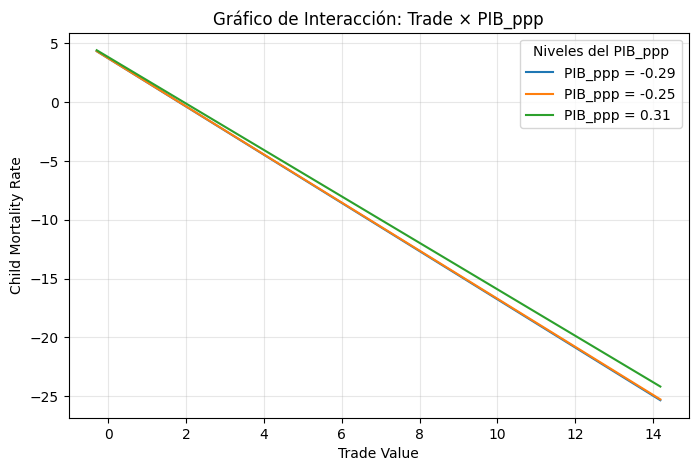

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Creamos niveles representativos de PIB (bajo, medio, alto) ---
pib_vals = np.percentile(base_scaled["PIB_ppp"], [10, 50, 90])

# Secuencia del predictor trade_value
x = np.linspace(base_scaled["trade_value"].min(),
                base_scaled["trade_value"].max(), 100)

plt.figure(figsize=(8,5))

for pib in pib_vals:
    temp_df = pd.DataFrame({
        "trade_value": x,
        "PIB_ppp": pib
    })
    y_pred = mod2.predict(temp_df)

    plt.plot(x, y_pred, label=f"PIB_ppp = {pib:.2f}")

plt.xlabel("Trade Value")
plt.ylabel("Child Mortality Rate")
plt.title("Gráfico de Interacción: Trade × PIB_ppp")
plt.legend(title="Niveles del PIB_ppp")
plt.grid(alpha=0.3)
plt.show()



Existe una interacción estadísticamente significativa entre el valor comercial y el PIB en la predicción de la tasa de mortalidad infantil. Esto indica que el efecto del comercio sobre la mortalidad infantil varía significativamente según el nivel de desarrollo económico del país. Además graficamente podemos notar que hay pendiente negativa.

Ahora extraigo los 10 países más ricos y más pobres promediando los resultados para tomar en cuenta todos los años


In [23]:
# Para la década 2000-2020
decada_2000 = base_original[base_original['year'].between(2000, 2020)]

# Agrupar por país y calcular promedios de la década
paises_promedio = decada_2000.groupby('area').agg({
    'PIB_ppp': 'mean',
    'child_mortality_rate': 'mean',
    'trade_value': 'mean',
    'year': 'count'  # Para ver cuántos años tiene cada país
}).reset_index()

# Renombrar columnas
paises_promedio.columns = ['area', 'PIB_ppp_promedio', 'child_mortality_promedio',
                          'trade_value_promedio', 'años_disponibles']

# Ahora sí: 10 países más ricos y pobres (países diferentes)
paises_ricos = paises_promedio.nlargest(10, 'PIB_ppp_promedio')
paises_pobres = paises_promedio.nsmallest(10, 'PIB_ppp_promedio')

print("=== 10 PAÍSES MÁS RICOS (Promedio 2000-2020) ===")
print(paises_ricos[['area', 'PIB_ppp_promedio', 'child_mortality_promedio', 'trade_value_promedio']])

print("\n=== 10 PAÍSES MÁS POBRES (Promedio 2000-2020) ===")
print(paises_pobres[['area', 'PIB_ppp_promedio', 'child_mortality_promedio', 'trade_value_promedio']])

=== 10 PAÍSES MÁS RICOS (Promedio 2000-2020) ===
          area      PIB_ppp_promedio  child_mortality_promedio  \
29       China 13,226,489,523,809.52                      1.81   
62       India  5,523,187,142,857.14                      5.95   
68       Japan  4,561,825,238,095.24                      0.33   
50     Germany  3,428,677,142,857.14                      0.43   
19      Brazil  2,580,981,428,571.43                      2.10   
47      France  2,392,559,523,809.52                      0.45   
66       Italy  2,100,597,619,047.62                      0.41   
63   Indonesia  2,078,517,142,857.14                      3.52   
89      Mexico  1,876,950,000,000.00                      1.97   
125      Spain  1,463,029,571,428.57                      0.40   

     trade_value_promedio  
29       2,163,135,681.76  
62         201,857,603.33  
68         643,160,517.19  
50       1,189,859,086.29  
19         168,964,842.14  
47         498,449,306.19  
66         435,182,248.43  


H0: u1 = u2 = u3

H1: al menos un par de medias es diferente

In [24]:
from scipy import stats

# Test t para comparar medias
t_stat_pib, p_val_pib = stats.ttest_ind(paises_ricos['PIB_ppp_promedio'], paises_pobres['PIB_ppp_promedio'])
t_stat_mortalidad, p_val_mortalidad = stats.ttest_ind(paises_ricos['child_mortality_promedio'], paises_pobres['child_mortality_promedio'])
t_stat_comercio, p_val_comercio = stats.ttest_ind(paises_ricos['trade_value_promedio'], paises_pobres['trade_value_promedio'])

print("\n=== SIGNIFICANCIA ESTADÍSTICA (Test t) ===")
print(f"PIB: t = {t_stat_pib:.2f}, p-value = {p_val_pib:.6f} {'***' if p_val_pib < 0.001 else '**' if p_val_pib < 0.01 else '*' if p_val_pib < 0.05 else 'ns'}")
print(f"Mortalidad: t = {t_stat_mortalidad:.2f}, p-value = {p_val_mortalidad:.6f} {'***' if p_val_mortalidad < 0.001 else '**' if p_val_mortalidad < 0.01 else '*' if p_val_mortalidad < 0.05 else 'ns'}")
print(f"Comercio: t = {t_stat_comercio:.2f}, p-value = {p_val_comercio:.6f} {'***' if p_val_comercio < 0.001 else '**' if p_val_comercio < 0.01 else '*' if p_val_comercio < 0.05 else 'ns'}")


=== SIGNIFICANCIA ESTADÍSTICA (Test t) ===
PIB: t = 3.53, p-value = 0.002370 **
Mortalidad: t = -1.51, p-value = 0.149280 ns
Comercio: t = 2.97, p-value = 0.008244 **


Hay suficiente evidencia estadística para rechazar la H0 de igualdad de medias en el PIB y el comercio (exportación de productos). Lo cual nos quiere decir que entre los 10 países más ricos y los 10 más pobres sí hay diferencias en el PIB y el comercio. Por otro lado, no hay suficiente evidencia estadística para decir que hay diferencias relacionadas a la mortalidad infantil

In [25]:
base_original.to_csv('base_original.csv', index=False)
print('DataFrame base_original guardado como base_original.csv')

DataFrame base_original guardado como base_original.csv


In [27]:
#!pip install ipywidgets
from google.colab import output
output.enable_custom_widget_manager()


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# --- CONTROLES ---

todos_paises = sorted(base_original['area'].unique())

pais_dropdown = widgets.SelectMultiple(
    options=todos_paises,
    description="Países",
    style={'description_width': 'initial'},
    rows=15  # Increased rows for better visibility
)

# Add instruction for multiple selection
multi_select_info = widgets.HTML(
    value="<p><small>Para seleccionar varios países, mantenga presionada la tecla <b>Ctrl</b> (o <b>Cmd</b> en Mac) y haga clic en los países deseados.</small></p>"
)

slider_anios = widgets.IntRangeSlider(
    value=[2005, 2015],
    min=int(base_original['year'].min()),
    max=int(base_original['year'].max()),
    step=1,
    description="Años"
)

chk_tendencia = widgets.Checkbox(
    value=True,
    description="Mostrar tendencia"
)

btn = widgets.Button(description="Generar gráfico", button_style='success')

# Consolidated output widget for all plots
main_output = widgets.Output()

# New comparison button
compare_button = widgets.Button(
    description='Comparar Países Ricos vs. Pobres',
    button_style='info',
    tooltip='Click para comparar métricas entre países ricos y pobres'
)

# --- FUNCIÓN DEL GRÁFICO DE EVOLUCIÓN ---
def actualizar_click(b):
    with main_output: # Use the consolidated output
        main_output.clear_output()

        paises_sel = list(pais_dropdown.value)

        datos = base_original[
            (base_original['year'] >= slider_anios.value[0]) &
            (base_original['year'] <= slider_anios.value[1])
        ]

        if paises_sel:
            datos = datos[datos['area'].isin(paises_sel)]

        if datos.empty:
            print("No hay datos para los filtros seleccionados.")
            return

        plt.figure(figsize=(14, 6))

        paises = paises_sel if paises_sel else datos['area'].unique()

        for pais in paises:
            dfp = datos[datos['area'] == pais].sort_values('year')
            plt.plot(dfp['year'], dfp['child_mortality_rate'], marker='o', linewidth=2, label=pais)

            if chk_tendencia.value and len(dfp) > 1:
                z = np.polyfit(dfp['year'], dfp['child_mortality_rate'], 1)
                p = np.poly1d(z)
                plt.plot(dfp['year'], p(dfp['year']), '--', alpha=0.5)

        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title("Evolución de Mortalidad Infantil por País")
        plt.grid(True)
        plt.show()

# --- FUNCIÓN PARA EL BOTÓN DE COMPARACIÓN ---
def on_compare_button_clicked(b):
    with main_output: # Use the consolidated output
        main_output.clear_output()
        # Extract country lists for richest and poorest
        richest_countries_list = paises_ricos['area'].tolist()
        poorest_countries_list = paises_pobres['area'].tolist()
        plot_country_comparison(base_original, richest_countries_list, poorest_countries_list)

btn.on_click(actualizar_click)
compare_button.on_click(on_compare_button_clicked)

# --- INTERFAZ ---
display(
    widgets.HBox([
        widgets.VBox([pais_dropdown, multi_select_info]), # Added multi_select_info here
        widgets.VBox([slider_anios, chk_tendencia, btn, compare_button])
    ]),
    main_output # Display the consolidated output widget
)


Output()

In [29]:
base_original.columns


Index(['area', 'year', 'PIB_ppp', 'trade_flow', 'trade_value',
       'child_mortality_rate'],
      dtype='object')